In [1]:
import SimpleITK as sitk 
import numpy as np 
import matplotlib.pyplot as plt 
from library_dicom.dicom_processor.tools.preprocessing import *
import json 
import csv 
from sklearn.model_selection import train_test_split 
import tensorflow as tf 
from classification.Prep_CSV import Prep_CSV
from classification.Preprocessing import Preprocessing 
from classification.resnet50 import *

In [2]:
#csv 
json_path = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/result.json'
nifti_directory = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92'
objet = Prep_CSV(json_path)
objet.result_csv(nifti_directory)
print(objet.csv_result_path)

/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/classif_test.csv


In [15]:
prep_objet = Preprocessing(objet.csv_result_path)
X1, y = prep_objet.normalize_encoding_dataset()
X = []
for x in X1 : 
    X.append(x[1])

X=np.asarray(X)
print(X.shape)


(526, 1024, 256, 1)


In [16]:
print("size of X : ", X.shape)
print("size of y : ",y.shape)

size of X :  (526, 1024, 256, 1)
size of y :  (526, 4)


In [6]:
#Prepare Train, Test, Val set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20)

print("size of X_train : ", X_train.shape)
print("size of y_train : ",y_train.shape)
print("")
print("size of X_test : ", X_test.shape)
print("size of y_test : ",y_test.shape)
print("")
print("size of X_val : ", X_val.shape)
print("size of y_val : ",y_val.shape)


size of X_train :  (336, 1024, 256, 1)
size of y_train :  (336, 4)

size of X_test :  (106, 1024, 256, 1)
size of y_test :  (106, 4)

size of X_val :  (84, 1024, 256, 1)
size of y_val :  (84, 4)


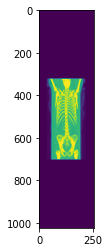

In [12]:
plt.imshow(X_val[0])

In [6]:
#Model 
model = ResNet50(input_shape=(1024, 256, 1))

In [7]:
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1024, 256, 1 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 1030, 262, 1) 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 512, 128, 64) 3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 512, 128, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [8]:
#compile 
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5) #param
        #loss = tf.keras.losses.CategoricalCrossentropy(#param)
model.compile(optimizer = optimizer, 
        loss={'left_arm' : 'binary_crossentropy', 
            'right_arm' : 'binary_crossentropy', 
             'head' : 'binary_crossentropy', 
             'leg' : 'binary_crossentropy'}, 
        loss_weights ={'left_arm': 1., 
                       'right_arm' : 1., 
                        'head' : 1., 
                        'leg': 1.}, 
        metrics = {'left_arm': ['accuracy', 'BinaryCrossentropy'], 
                    'right_arm' : ['accuracy', 'BinaryCrossentropy'], 
                    'head' : ['accuracy', 'BinaryCrossentropy'], 
                    'leg':['accuracy', 'BinaryCrossentropy']}) #a voir pour loss

In [ ]:
#fit 
#K Fold, Xtrain_test_val qui change a chaque epoch : boucle ici 


history = model.fit(X_train, {'head': y_train[:,0], 
                                    'leg': y_train[:,1],
                                    'right_arm' : y_train[:,2],
                                    'left_arm' : y_train[:,3] ,
                                    }, 
                                    
                        epochs = 2, 
                        batch_size = 100, 
                        verbose = 1, 
                        validation_data = (X_val, {'head': y_val[:,0], 
                                    'leg': y_val[:,1],
                                    'right_arm' : y_val[:,2],
                                    'left_arm' : y_val[:,3] ,
                                    }))


#model evaluate with X_test and Y_test

#score = model.evaluate(X_test, {'head': y_test[:,0], 
#                                    'leg': y_test[:,1],
#                                    'right_arm' : y_test[:,2],
#                                    'left_arm' : y_test[:,3] ,
#                                    }, verbose=1,  return_dict = True) #see other parameters

In [ ]:
#save model 
model.save('/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/Classification/Resnet50/resnet50', save_format='h5')